[tutorial](https://machinelearningmastery.com/time-series-data-stationary-python/)

# How to Check if Time Series Data is Stationary with Python
The temporal structure adds an order to the observations. This imposed order means that important assumptions about the consistency of those observations needs to be handled specifically.

For example, when modeling, there are assumptions that the summary statistics of observations are consistent. In time series terminology, we refer to this expectation as the time series being stationary.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

In [ ]:
# #!  curl -o daily-total-female-births.csv https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv?accessType=DOWNLOAD

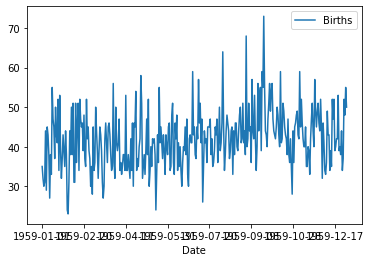

In [2]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
series.plot()
pyplot.show()

## Non-Stationary Time Series

Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.

Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.

In [4]:
#! curl -o international-airline-passengers.csv https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2180  100  2180    0     0  19122      0 --:--:-- --:--:-- --:--:-- 19122


Below is an example of the Airline Passengers dataset that is non-stationary, showing both trend and seasonal components.

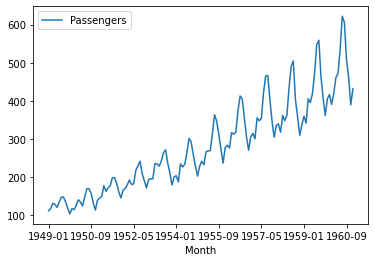

In [5]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('international-airline-passengers.csv', header=0, index_col=0)
series.plot()
pyplot.show()

 finer-grained notions of stationarity
 
    * Stationary Process: A process that generates a stationary series of observations.
    * Stationary Model: A model that describes a stationary series of observations.
    * Trend Stationary: A time series that does not exhibit a trend.
    * Seasonal Stationary: A time series that does not exhibit seasonality.
    * Strictly Stationary: A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.


# Should you make your time series stationary?

Generally, yes.

If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.

We turn to machine learning methods when the classical methods fail. When we want more or better results. We cannot know how to best model unknown nonlinear relationships in time series data and some methods may result in better performance when working with non-stationary observations or some mixture of stationary and non-stationary views of the problem.

## Checks for Stationarity

There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

   * Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
   * Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
   * Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.


## Summary Statistics

A quick and dirty check to see if your time series is non-stationary is to review summary statistics.

You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [8]:

X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


In [9]:
series = read_csv('international-airline-passengers.csv', header=0, index_col=0)
X = series.values
split = len(X) / 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

TypeError: slice indices must be integers or None or have an __index__ method

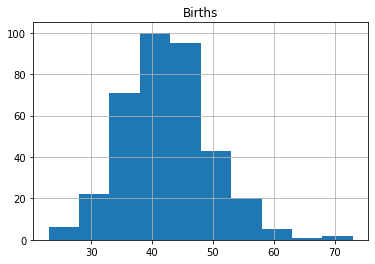

In [7]:
# plots for births (gaussian distribution)
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
series.hist()
pyplot.show()

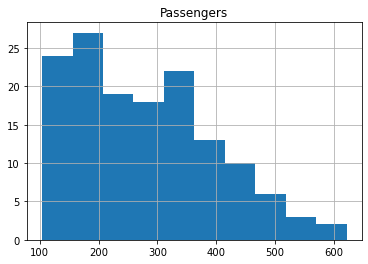

In [10]:
# plot for airlines (non gaussian distribution)
series = read_csv('international-airline-passengers.csv', header=0, index_col=0)
series.hist()
pyplot.show()

This may suggest an exponential growth from season to season. A log transform can be used to flatten out exponential change back to a linear relationship.

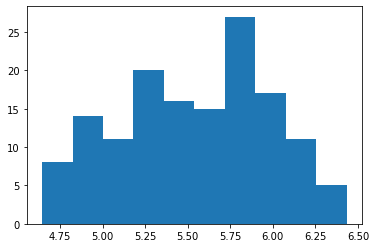

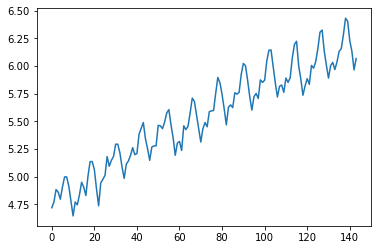

In [13]:
# same histogram but this time with log transform
from numpy import log
X = series.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [14]:
X = series.values
X = log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


## Augmented Dickey-Fuller test
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

tl;dr: p-value assume that your test is innocent p<=0.05 until proven guilty

   * Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
   * Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


   * p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
   * p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.



In [22]:
from statsmodels.tsa.stattools import adfuller
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [19]:
series = read_csv('international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [20]:
result = adfuller(X)
result

(0.8153688792060585,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [21]:
# same as above but logarithmic this time
series = read_csv('international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
X = series.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579
